In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pickle as pkl

<div dir="rtl">   להלן הדוגמא הבאה: במפעל להכנת זכויות משתמשים בנַתְרָן פַּחְמָתִי. חומר זה בכמות גבוהה מדי יכול להיות מסוכן. נרצה לבדוק האם שיעור הנתרן הפחמתי משפיע על רמת זיהום האוויר ברצפת הייצור. רמת זיהום היאו דירוג רציף הנע בין 0 ל-50. נראה לראות האם שיעור הנתרן הפחמתי אכן משפיע ואיך.

In [ ]:
num_points = 120
x_vals = np.linspace(0,1,num_points)
y_vals_trans_1 = pkl.load(open('../pkl/y_vals_trans_1.pkl', 'rb'))

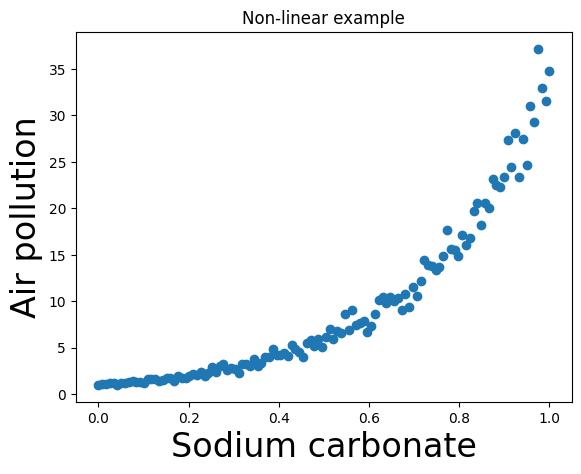

In [ ]:
plt.figure()
plt.title('Non-linear example')
plt.xlabel('Sodium carbonate', fontsize= 24)
plt.ylabel('Air pollution', fontsize= 24)
plt.scatter(x_vals, y_vals_trans_1)
plt.show()

<div dir="rtl">  בוא נראה מה קורה אם אנחנו מתעלמים מחוסר הליניאריות. 

In [9]:
x_vals1.shape, y_vals_trans_1.shape

((120, 2), (120,))

In [12]:
# Assuming X_train and y_train are your training data
x_vals1 = sm.add_constant(x_vals)  # Add a constant (intercept) term to the features
## If we don't add it, the intercept will be 0.
# Create a linear regression model

df_data = pd.DataFrame(np.append(x_vals1, y_vals_trans_1.reshape( y_vals_trans_1.shape[0],1), axis = 1), columns = ['intercept', 'Sodium', 'Pollution'])

model = sm.OLS(df_data['Pollution'], df_data[['intercept', 'Sodium']])
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Pollution   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     541.7
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           6.40e-46
Time:                        11:54:15   Log-Likelihood:                -329.73
No. Observations:                 120   AIC:                             663.5
Df Residuals:                     118   BIC:                             669.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.4595      0.691     -6.454      0.0

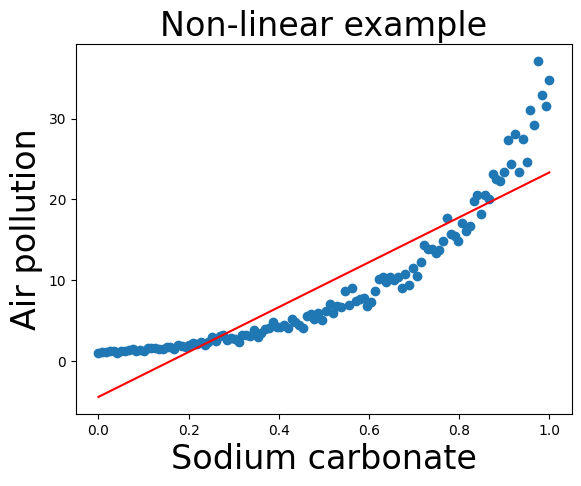

In [13]:
plt.figure()
plt.title('Non-linear example', fontsize= 24)
plt.xlabel('Sodium carbonate', fontsize= 24)
plt.ylabel('Air pollution', fontsize= 24)
plt.scatter(x_vals, y_vals_trans_1)
plt.plot(x_vals, results.predict(x_vals1), color = 'red')
plt.show()

## Transforming the data

<div dir="rtl">  במקום להשתמש בערכים האמיתיים של המשתנה המוסבר ננסה לעשות איזשהו טרנספורמציה ואולי נצליח לעשות למצוא קשר יותר ליניארי. להלן מספר טרנספורמציות אפשריות.

1. $Ln(Y)$ or $Log(Y)$
2. $Exp(Y)$
3. $Y^{0.5}$
4. $Y^2$

The model is:

$$ Ln(\hat{Y}) = b_0 + b_1 X_1 $$

Or,

$$ \hat{Y} = Exp(b_0 + b_1 X_1) $$

<div dir="rtl"> נתחיל עם טרנספורמציה של Ln.

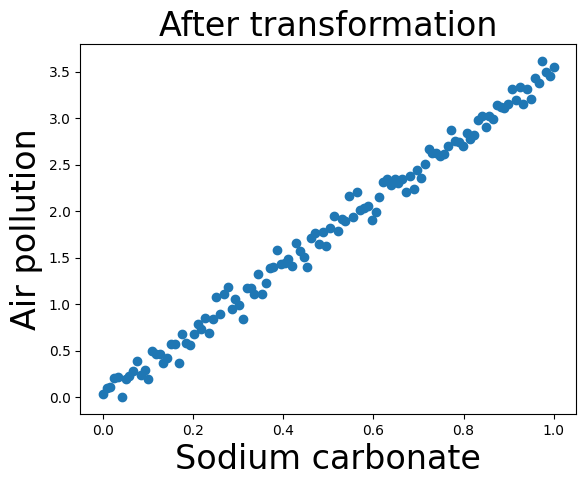

In [14]:
log_Y_trans_1 = np.log(y_vals_trans_1)
plt.figure()
plt.title('After transformation', fontsize= 24)
plt.xlabel('Sodium carbonate', fontsize= 24)
plt.ylabel('Air pollution', fontsize= 24)
plt.scatter(x_vals, log_Y_trans_1)
plt.show()

In [16]:
# Create a linear regression model
df_data1 = pd.DataFrame(np.append(x_vals1, log_Y_trans_1.reshape( log_Y_trans_1.shape[0],1), axis = 1), columns = ['intercept', 'Sodium', 'Pollution'])

model_trans1 = sm.OLS(df_data1['Pollution'], df_data1[['intercept', 'Sodium']])
# Fit the model
results_trans1 = model_trans1.fit()
# Print summary statistics, including p-values for each coefficient
print(results_trans1.summary())

                            OLS Regression Results                            
Dep. Variable:              Pollution   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.304e+04
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.17e-122
Time:                        11:58:18   Log-Likelihood:                 109.46
No. Observations:                 120   AIC:                            -214.9
Df Residuals:                     118   BIC:                            -209.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0092      0.018      0.516      0.6

<div dir="rtl"> אפשר לראות שעכשיו המדד של $R^2$ גדל משמעותית ל 0.991.

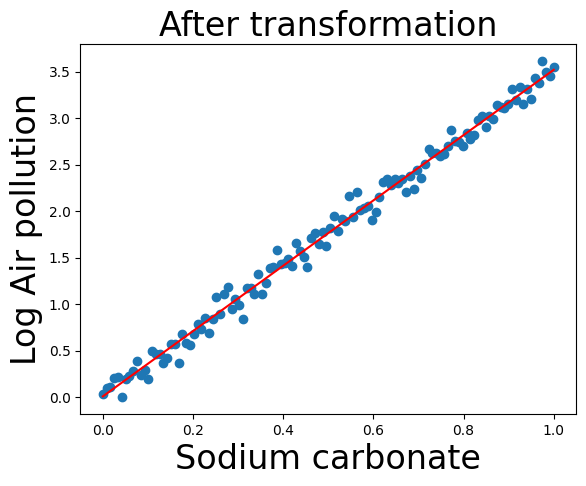

In [27]:
plt.figure()
plt.title('After transformation', fontsize= 24)
plt.xlabel('Sodium carbonate', fontsize= 24)
plt.ylabel('Log Air pollution', fontsize= 24)
plt.scatter(x_vals, log_Y_trans_1)
plt.plot(x_vals, results_trans1.predict(x_vals1), color = 'red')
plt.show()

<div dir="rtl"> מה היה קורה אילו היינו עושים טרנספורמציה אחרת?
ננסה לעשות עכשיו טרנספורמצית שורש, כלומר:

$$ \sqrt{y} = b_0 +b_1 X_1$$

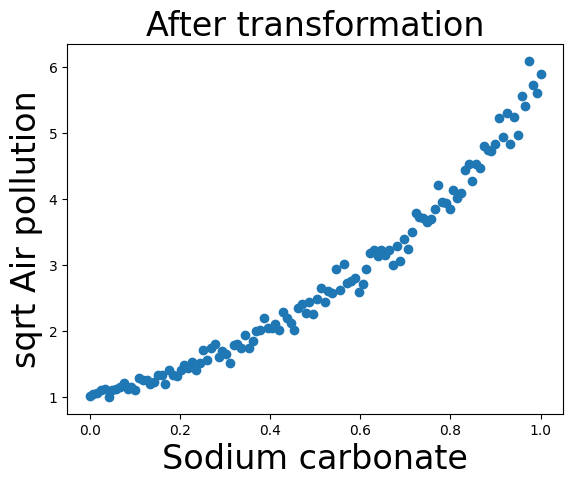

In [28]:
sqrt_Y_trans_1 = y_vals_trans_1**0.5
plt.figure()
plt.title('After transformation', fontsize= 24)
plt.xlabel('Sodium carbonate', fontsize= 24)
plt.ylabel('sqrt Air pollution', fontsize= 24)
plt.scatter(x_vals, sqrt_Y_trans_1)
plt.show()

In [29]:
# Create a linear regression model
model_trans2 = sm.OLS(sqrt_Y_trans_1, x_vals1)
# Fit the model
results_trans2 = model_trans2.fit()
# Print summary statistics, including p-values for each coefficient
print(results_trans2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1891.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.76e-74
Time:                        13:11:28   Log-Likelihood:                -38.487
No. Observations:                 120   AIC:                             80.97
Df Residuals:                     118   BIC:                             86.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4541      0.061      7.443      0.0

<div dir="rtl"> נראה שזה עדיף על פני המקור אבל פחות טוב מה$Ln$.

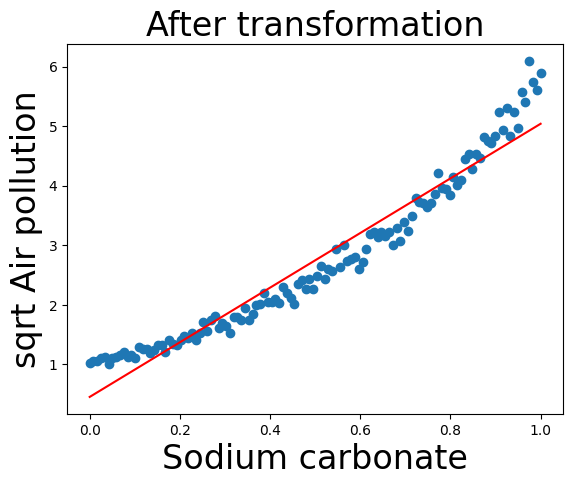

In [30]:
plt.figure()
plt.title('After transformation', fontsize= 24)
plt.xlabel('Sodium carbonate', fontsize= 24)
plt.ylabel('sqrt Air pollution', fontsize= 24)
plt.scatter(x_vals, sqrt_Y_trans_1)
plt.plot(x_vals, results_trans2.predict(x_vals1), color = 'red')
plt.show()

<div dir="rtl"> אחרי שעשינו טרספורמציה איך אנחנו עושים תחזית? הרי המודל חוזה ערכים של $Ln(\hat{Y})$ ולא ערכים של $\hat{Y}$.
תחילה נחזה את ערכי ה$Ln(\hat{Y}$ ואז נעשה את הטרנפורמציה ההפוכה.

1. $Ln(\hat{Y}) = b_o + b_1*X_1$
2. $\hat{Y} = Exp(Ln(\hat{Y}))$

<div dir="rtl">  למשל, ננסה לחזות מהי רמת הזיהום עבור שיעור נתרן פחמני של 0.4.

In [31]:
lny = results_trans1.predict(np.array([1, 0.4]))
lny

array([1.4132882])

<div dir="rtl"> ועכשיו נעשה טרנספורמציה

In [32]:
y = np.exp(lny)
y

array([4.10944588])

<div dir="rtl"> כלומר כאשר שיעור הנתרן הוא 0.4 רמת הזיהום היא 4.1.
עכשיו ננסה לצייר את רמת הזיהום עבור כל הערכים האפשריים של נתרן פחמני.

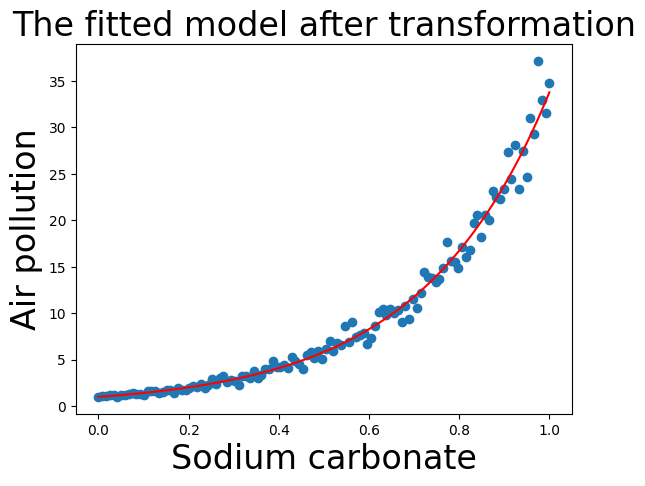

In [33]:
plt.figure()
plt.title('The fitted model after transformation', fontsize= 24)
plt.xlabel('Sodium carbonate', fontsize= 24)
plt.ylabel('Air pollution', fontsize= 24)
plt.scatter(x_vals, y_vals_trans_1)
plt.plot(x_vals, np.exp(results_trans1.predict(x_vals1)), color = 'red')
plt.show()

<div dir="rtl"> שאלה: ידוע כי יש תקנת בטיחות שאסור לעבור זיהום רמה 10. מהו שיעור הכמות המקסימלית של נתרן פחמני בו ניתן להשתמש במפעל?
נסתכל קודם גרפית:

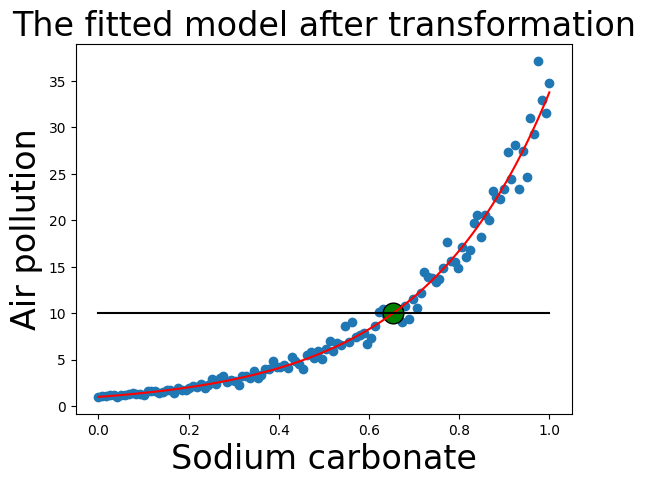

In [34]:
plt.figure()
plt.title('The fitted model after transformation', fontsize= 24)
plt.xlabel('Sodium carbonate', fontsize= 24)
plt.ylabel('Air pollution', fontsize= 24)
plt.scatter(x_vals, y_vals_trans_1)
plt.plot(x_vals, np.exp(results_trans1.predict(x_vals1)), color = 'red')
plt.plot(x_vals, 10*np.ones(x_vals.shape[0]), color = 'black')
plt.scatter(0.653, 10, color = 'green', s=222, edgecolors= "black")
plt.show()

$$ 10 = e^{0.0092 +  3.5103*X_1 } $$

$$ Ln(10) = 0.0092 + 3.5103*X_1 $$

$$ \frac{Ln(10)-0.0092}{3.5103} = X_1 $$

$$ X_1 =  0.653$$

 

In [35]:
## The actual computation
(np.log(10)-0.0092)/3.5103

0.6533302261897974